In [1]:
import os
import pandas as pd
import csv
path = "../data/"
file_name = ['chicago_2019.csv', 'chicago_2020.csv', 'chicago_2021.csv', 'chicago_2022.csv']
filenames =[path + file for file in file_name]
#print(filenames)

""" 
    Read Me: Basic File Merger, to combine the 2019-2022 census data
    Requires: file path list
"""
def fileMerger(path):
    df1 = pd.read_csv(path[0])
    df2 = pd.read_csv(path[1])
    df_merged = df1.merge(df2, how='outer')
    for file in path[2:]:
        temp = pd.read_csv(file)
        df_merged = df_merged.merge(temp, how='outer')
    return df_merged

df = fileMerger(filenames)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922148 entries, 0 to 922147
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    922148 non-null  int64  
 1   Case Number           922148 non-null  object 
 2   Date                  922148 non-null  object 
 3   Block                 922148 non-null  object 
 4   IUCR                  922148 non-null  object 
 5   Primary Type          922148 non-null  object 
 6   Description           922148 non-null  object 
 7   Location Description  917021 non-null  object 
 8   Arrest                922148 non-null  bool   
 9   Domestic              922148 non-null  bool   
 10  Beat                  922148 non-null  int64  
 11  District              922148 non-null  int64  
 12  Ward                  922103 non-null  float64
 13  Community Area        922146 non-null  float64
 14  FBI Code              922148 non-null  object 
 15  

In [3]:
df.isna().sum()
df2 = df.copy(deep=True)
df2.dropna(subset=['Latitude', 'Longitude', 'Location', 'X Coordinate', 'Y Coordinate'], inplace = True)
df2.dropna(subset=['Location Description'], inplace=True)
df2.dropna(subset=['Ward', 'Community Area'], inplace=True)
print(f"Retained { round(((df2.shape[0] / df.shape[0]) * 100), 4)}% of Data")

Retained 97.7495% of Data


In [4]:
df2.head(14)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11662417,JC232642,04/21/2019 12:30:00 PM,009XX E 80TH ST,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,8.0,44.0,03,1184044.0,1852159.0,2019,09/14/2023 03:41:59 PM,41.749500,-87.601157,"(41.749500329, -87.6011574)"
1,12990873,JG161829,08/17/2019 01:14:00 PM,008XX N KARLOV AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,...,37.0,23.0,17,1148899.0,1905351.0,2019,09/14/2023 03:41:59 PM,41.896215,-87.728572,"(41.89621515, -87.728572048)"
4,11765926,JC358692,07/21/2019 02:00:00 PM,002XX W 87TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,21.0,44.0,06,1176436.0,1847222.0,2019,09/15/2023 03:41:25 PM,41.736127,-87.629184,"(41.736126864, -87.629184056)"
5,11885224,JC502442,11/05/2019 08:00:00 PM,075XX S RHODES AVE,031A,ROBBERY,ARMED - HANDGUN,STREET,False,True,...,6.0,69.0,03,1181207.0,1855239.0,2019,09/15/2023 03:41:25 PM,41.758018,-87.611459,"(41.75801796, -87.611458525)"
9,11842146,JC449875,09/26/2019 08:53:00 PM,083XX S SANGAMON ST,0650,BURGLARY,HOME INVASION,RESIDENCE,False,True,...,17.0,71.0,05,1171415.0,1849590.0,2019,09/17/2023 03:41:45 PM,41.742736,-87.647510,"(41.742736236, -87.647510047)"
12,24886,JC564006,12/29/2019 11:25:00 AM,030XX W 39TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,12.0,58.0,01A,1156684.0,1878275.0,2019,09/19/2023 03:41:47 PM,41.821762,-87.700712,"(41.821761535, -87.700711857)"
15,12130000,JD325714,05/11/2019 12:00:00 AM,031XX W 42ND PL,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,...,12.0,58.0,02,1156098.0,1876287.0,2019,09/20/2023 03:41:26 PM,41.816318,-87.702915,"(41.816318027, -87.702915141)"
17,11921875,JC547110,12/13/2019 12:00:00 PM,116XX S RACINE AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,21.0,53.0,17,1170418.0,1827629.0,2019,09/22/2023 03:41:26 PM,41.682494,-87.651800,"(41.682493674, -87.65179998)"
19,11813944,JC416004,09/01/2019 01:04:00 PM,069XX S CAMPBELL AVE,041A,BATTERY,AGGRAVATED - HANDGUN,ALLEY,False,False,...,16.0,66.0,04B,1160905.0,1858617.0,2019,09/23/2023 03:41:15 PM,41.767731,-87.685770,"(41.767731081, -87.685770139)"
22,11767539,JC360516,07/22/2019 11:51:00 PM,011XX S RICHMOND ST,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,28.0,29.0,04B,1156863.0,1894999.0,2019,09/25/2023 03:41:39 PM,41.867650,-87.699602,"(41.867650491, -87.699602459)"


In [5]:
#basic feature engineering tasks
df2['Date-Time'] = pd.to_datetime(df2['Date'])
def month(x):
    return(int(x.strftime("%m")))
df2['Month'] = df2['Date-Time'].apply(month)

def day(x):
    return(int(x.strftime('%w')))
df2['Day'] = df2['Date-Time'].apply(day)

def hour(x):
    return int(x.strftime("%H"))
df2['Hour'] = df2['Date-Time'].apply(hour)

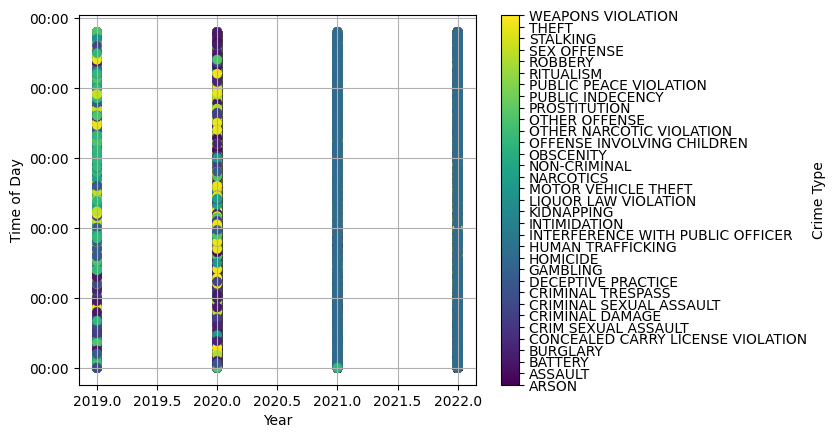

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
df2['Year'] = df2['Date-Time'].dt.year
df2['Time'] = df2['Date-Time'].dt.hour + df2['Date-Time'].dt.minute / 60
df2['CrimeTypeCategory'] = df2['Primary Type'].astype('category').cat.codes

fig, ax = plt.subplots()
scatter = ax.scatter(df2['Year'], df2['Time'], c=df2['CrimeTypeCategory'], cmap='viridis')
# Create a color bar with the crime type labels
colorbar = plt.colorbar(scatter, ticks=df2['CrimeTypeCategory'].unique())
colorbar.set_label('Crime Type')
colorbar.set_ticklabels(df2['Primary Type'].unique())
ax.set_xlabel('Year')
ax.set_ylabel('Time of Day')
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid(True)
plt.show()

Ignore above, the code doesn't run properly, neither does it make a cohesive way to filter out case-by-case basis for crime frequency. Come back to this code cell later, some minor issues.

In [9]:
# Creating our explicit dataset
chicago = df2.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type": "count"})
chicago = chicago.sort_values(by=['District'], ascending=False)
chicago.head()
# Renaming Primary Type to Crime_Count
ch = chicago.rename(index=str, columns={"Primary Type":"Count"})
ch.head()

,Month,Day,District,Hour,Count
44370,12,6,31,11,1
4225,2,0,31,7,1
28515,8,4,31,11,1
29044,8,5,31,14,1
13725,4,4,31,15,1


In [10]:
ch = ch[['Month','Day','District','Hour','Count']]
ch.head()
print("Shape:", ch.shape)
print(f"Highest Crime Count: {ch['Count'].max()}")
print(f"Highest Crime Count: {ch['Count'].min()}")

Shape: (44371, 5)
Highest Crime Count: 76
Highest Crime Count: 1


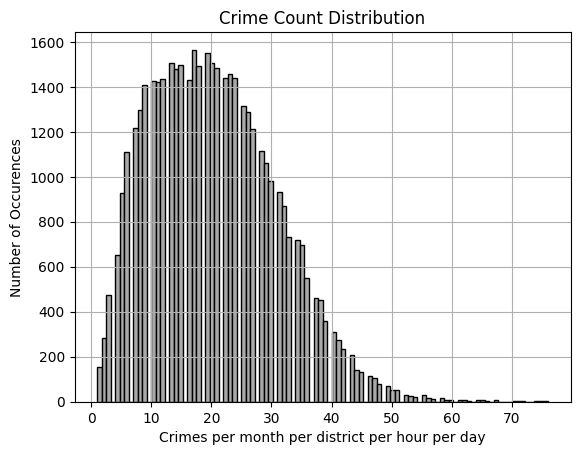

In [11]:
plt.hist(x='Count', data=ch,bins=100,linewidth=1,edgecolor='black', color='darkgrey')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")
plt.grid(True)
plt.show()

In [12]:
def calculate_crime_rate(x):
    if(x < 15):
        return 0
    elif(x >= 15 and x < 33):
        return 1
    else:
        #high crime rate
        return 2

ch['Crime Rate'] = ch['Count'].apply(calculate_crime_rate)
ch = ch[['Month', 'Day', 'District', 'Hour', 'Count', 'Crime Rate']]

In [13]:
# This is not a part of the ch dataset, this looks at the comparing dataset of the entirety of Chicago
print(df.shape)
""" 
This feature calculates the entirety of Chicago, IL
Get a better grasp on District to Case Number ratio
"""
counts = df2.groupby('District')['Case Number'].count()\
#df2.drop(['Crime Counts'], axis=True)
print(counts.sum())
df2.shape

(922148, 22)
901395


(901395, 28)

In [14]:
import numpy as np
ch.describe()
df2['Longitude'].describe()

count    901395.000000
mean        -87.669643
std           0.060100
min         -91.686566
25%         -87.712234
50%         -87.663123
75%         -87.627192
max         -87.524529
Name: Longitude, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Figure size 1800x900 with 0 Axes>

/Users/kensukefukutomi/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


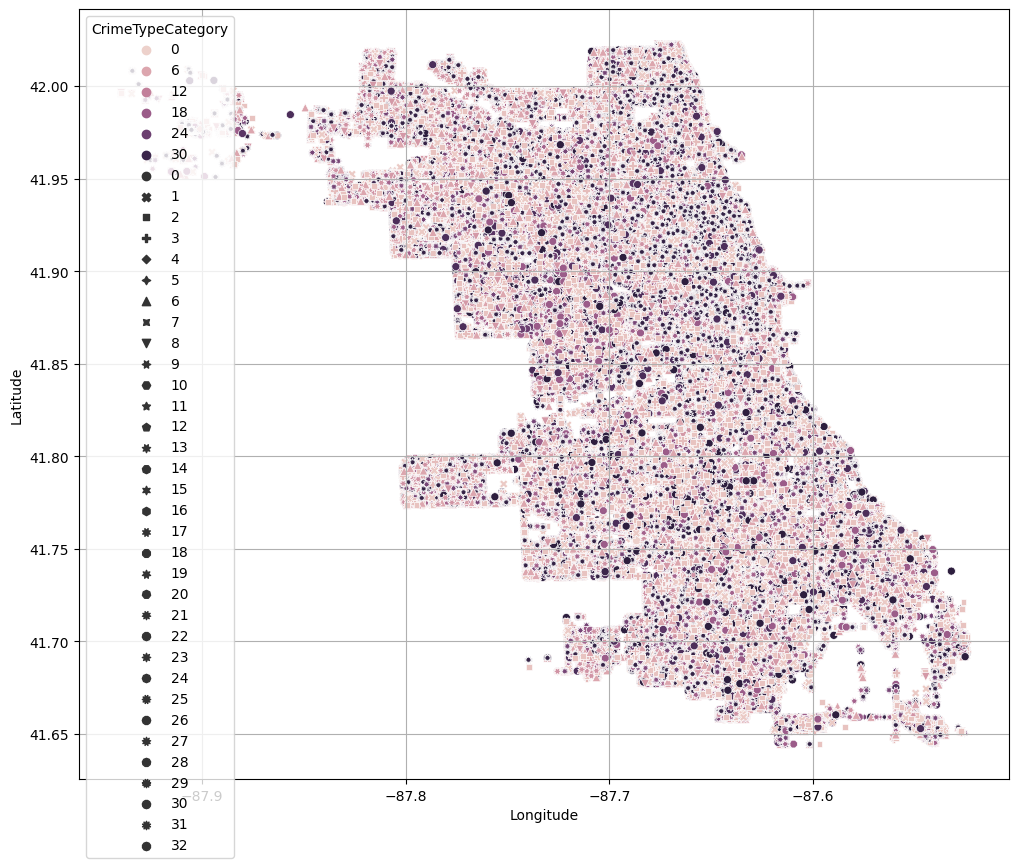

In [ ]:
plt.figure(figsize=(18, 9))
valid_longitudes = (df2['Longitude'] > -88) & (df2['Longitude'] < -87)
valid_latitudes = (df2['Latitude'] > 41) & (df2['Latitude'] < 43)

# Apply the filters
chicago_filtered = df2[valid_longitudes & valid_latitudes]

# Plotting
plt.figure(figsize=(12, 10))
plt.scatter(chicago_filtered['Longitude'], chicago_filtered['Latitude'], alpha=0.6,)
plt.title('Crime Rate by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,10))
sb.scatterplot(x = chicago_filtered['Longitude'], y = chicago_filtered['Latitude'], hue=df2["CrimeTypeCategory"], style=df2["CrimeTypeCategory"])
plt.grid(True)
plt.show()